In [80]:
import numpy as np
import os
import math
import pandas as pd
from collections import Counter
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD, Adadelta, Adam
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
from confusion_matrix import print_confusion_matrix

In [81]:
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

In [3]:
main_path_word_emb = "C:/Users/svruchtel/Documents/1/Texts classification/LSTM_results_word_emb/"
main_path_char_emb = "C:/Users/svruchtel/Documents/1/Texts classification/LSTM_results_char_emb/"

In [38]:
y_train_word_emb = np.load(main_path_word_emb + "France_ByShape_2nd_net_train_y.npy")
y_train_char_emb = np.load(main_path_char_emb + "France_ByShape_1st_net_train_y.npy")

y_test_word_emb = np.load(main_path_word_emb + "France_ByShape_2nd_net_test_y.npy")
y_test_char_emb = np.load(main_path_char_emb + "France_ByShape_1st_net_test_y.npy")

In [50]:
y_train = y_train_word_emb
y_test = y_test_word_emb

In [39]:
# print(y_test_word_emb.shape)
# print(y_test_char_emb.shape)

(362, 3)
(362, 3)


In [19]:
# for idx in range(len(y_train_2nd_net_word_emb)):
#     if y_train_2nd_net_word_emb[0].any() != y_train_3rd_net_word_emb[0].any():
#         print("problem")

In [25]:
# for idx in range(len(y_train_word_emb)):
#     if y_train_word_emb[0].any() != y_train_word_emb[0].any():
#         print("problem")

In [35]:
# let's load what we need
X_train_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByShape_2nd_net_train_X.npy")
X_train_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByShape_3rd_net_train_X.npy")
X_train_4th_net_word_emb = np.load(main_path_word_emb + "France_ByShape_4th_net_train_X.npy")

X_test_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByShape_2nd_net_test_X.npy")
X_test_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByShape_3rd_net_test_X.npy")
X_test_4th_net_word_emb = np.load(main_path_word_emb + "France_ByShape_4th_net_test_X.npy")

X_train_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByShape_3rd_net_train_X_100_chars.npy")
X_train_4th_net_char_emb = np.load(main_path_char_emb + "France_ByShape_4th_net_train_X_100_chars.npy")

X_test_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByShape_3rd_net_test_X_100_chars.npy")
X_test_4th_net_char_emb = np.load(main_path_char_emb + "France_ByShape_4th_net_test_X_100_chars.npy")

In [40]:
CATEGORIES_COUNT = 3

In [48]:
X_train_2_3 = np.concatenate((X_train_2nd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_2_3 = np.concatenate((X_test_2nd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_2_4 = np.concatenate((X_train_2nd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_2_4 = np.concatenate((X_test_2nd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_3_3 = np.concatenate((X_train_3rd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_3_3 = np.concatenate((X_test_3rd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_3_4 = np.concatenate((X_train_3rd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_3_4 = np.concatenate((X_test_3rd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_4_3 = np.concatenate((X_train_4th_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_4_3 = np.concatenate((X_test_4th_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_4_4 = np.concatenate((X_train_4th_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_4_4 = np.concatenate((X_test_4th_net_word_emb, X_test_4th_net_char_emb), axis=1)

## knn_uniform

#### 2_word, 3_char

test accuracy:  0.8895

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 213   97    5]
 [  29 2596   12]
 [   4   49  229]]
Normalized confusion matrix
[[0.67619048 0.30793651 0.01587302]
 [0.01099735 0.98445203 0.00455063]
 [0.0141844  0.17375887 0.81205674]]


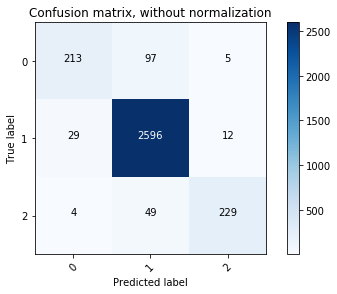

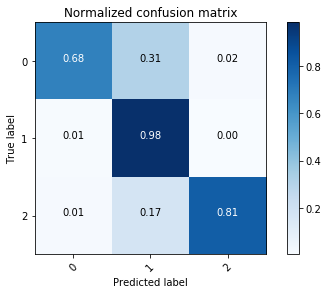


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 19  15   2]
 [  3 280  11]
 [  1   8  23]]
Normalized confusion matrix
[[0.52777778 0.41666667 0.05555556]
 [0.01020408 0.95238095 0.03741497]
 [0.03125    0.25       0.71875   ]]


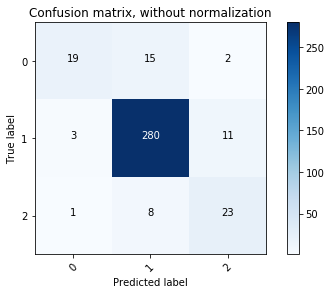

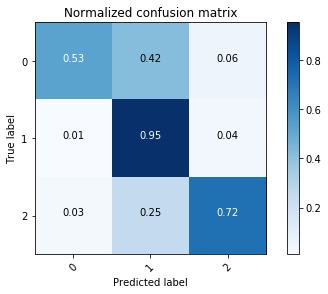

In [52]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)


#### 2 word, 4 char

test accuracy:  0.8950

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 220   91    4]
 [  32 2594   11]
 [   4   53  225]]
Normalized confusion matrix
[[0.6984127  0.28888889 0.01269841]
 [0.012135   0.98369359 0.00417141]
 [0.0141844  0.18794326 0.79787234]]


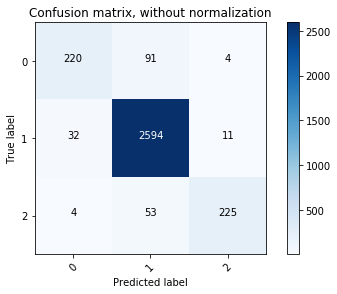

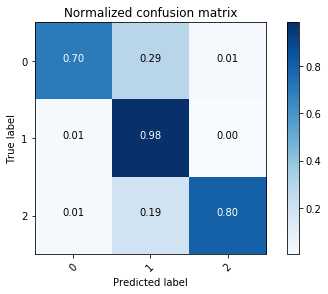


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 21  13   2]
 [  3 281  10]
 [  1   9  22]]
Normalized confusion matrix
[[0.58333333 0.36111111 0.05555556]
 [0.01020408 0.95578231 0.03401361]
 [0.03125    0.28125    0.6875    ]]


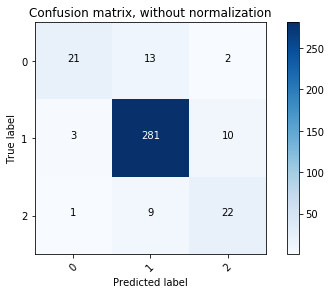

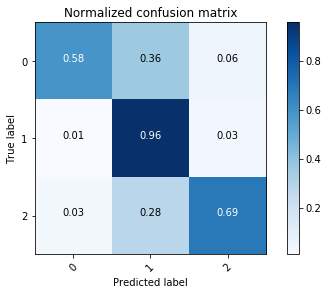

In [53]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.8674

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 216   94    5]
 [  14 2601   22]
 [   0   43  239]]
Normalized confusion matrix
[[0.68571429 0.2984127  0.01587302]
 [0.00530906 0.98634812 0.00834281]
 [0.         0.15248227 0.84751773]]


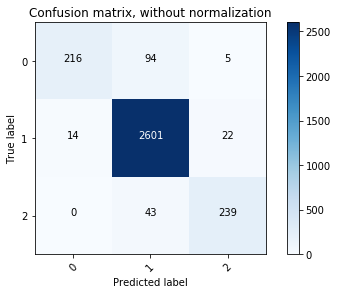

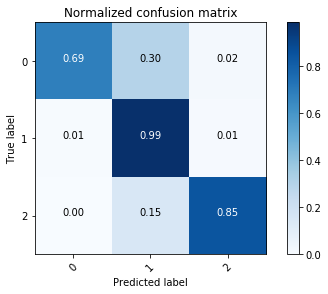


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 20  13   3]
 [  3 274  17]
 [  0  12  20]]
Normalized confusion matrix
[[0.55555556 0.36111111 0.08333333]
 [0.01020408 0.93197279 0.05782313]
 [0.         0.375      0.625     ]]


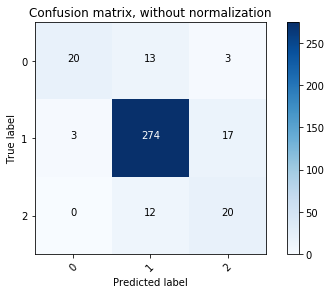

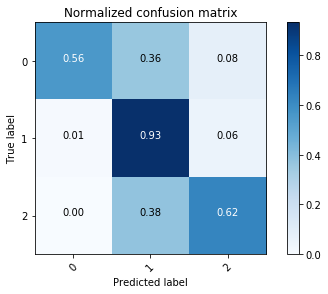

In [54]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.8591

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 224   87    4]
 [  18 2600   19]
 [   1   43  238]]
Normalized confusion matrix
[[0.71111111 0.27619048 0.01269841]
 [0.00682594 0.9859689  0.00720516]
 [0.0035461  0.15248227 0.84397163]]


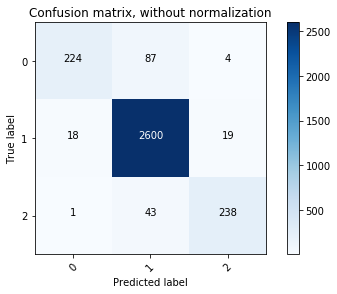

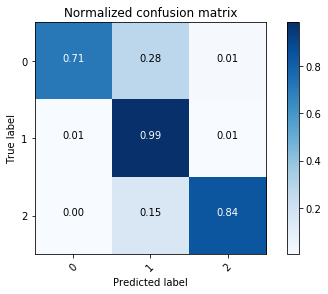


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 18  15   3]
 [  3 274  17]
 [  1  12  19]]
Normalized confusion matrix
[[0.5        0.41666667 0.08333333]
 [0.01020408 0.93197279 0.05782313]
 [0.03125    0.375      0.59375   ]]


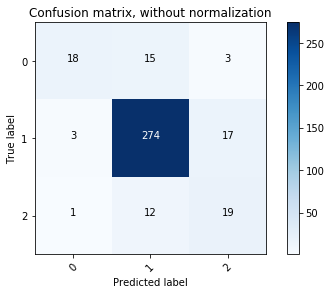

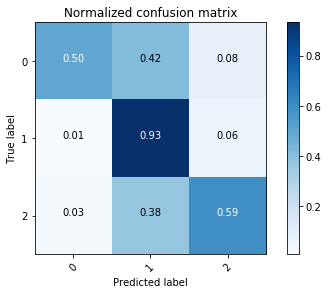

In [55]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.8757

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 209  102    4]
 [  16 2593   28]
 [   2   46  234]]
Normalized confusion matrix
[[0.66349206 0.32380952 0.01269841]
 [0.0060675  0.98331437 0.01061813]
 [0.0070922  0.16312057 0.82978723]]


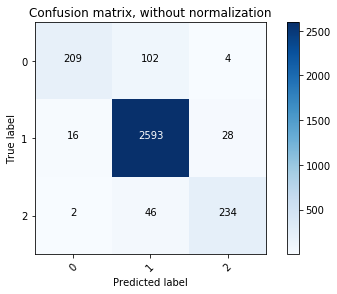

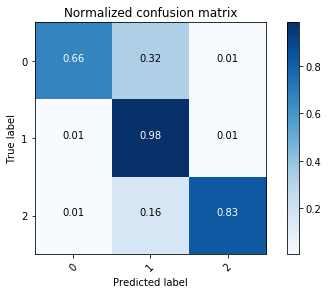


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 16  14   6]
 [  3 279  12]
 [  0  10  22]]
Normalized confusion matrix
[[0.44444444 0.38888889 0.16666667]
 [0.01020408 0.94897959 0.04081633]
 [0.         0.3125     0.6875    ]]


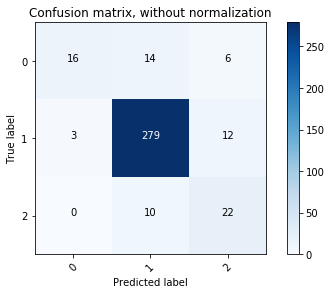

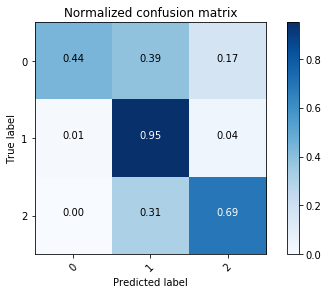

In [56]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.8757

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 208  103    4]
 [  14 2594   29]
 [   0   45  237]]
Normalized confusion matrix
[[0.66031746 0.32698413 0.01269841]
 [0.00530906 0.98369359 0.01099735]
 [0.         0.15957447 0.84042553]]


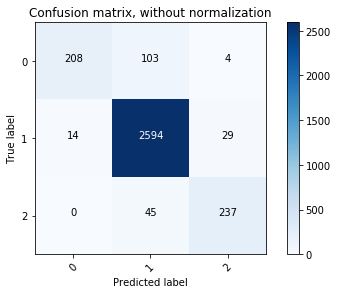

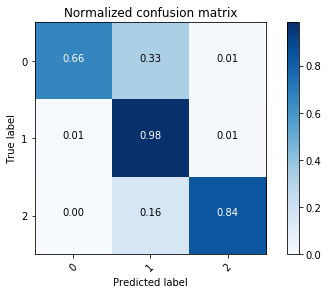


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 17  13   6]
 [  2 278  14]
 [  0  10  22]]
Normalized confusion matrix
[[0.47222222 0.36111111 0.16666667]
 [0.00680272 0.94557823 0.04761905]
 [0.         0.3125     0.6875    ]]


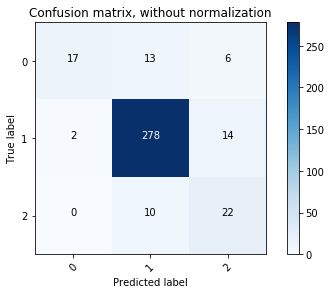

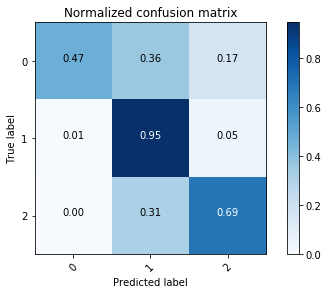

In [57]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### knn_distance

#### 2 word, 3 char

test accuracy:  0.8867

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 315    0    0]
 [   0 2637    0]
 [   0    0  282]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


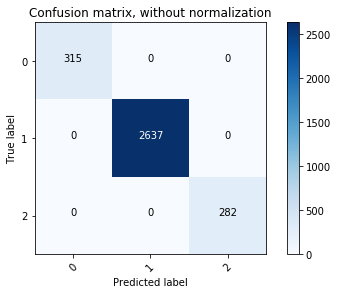

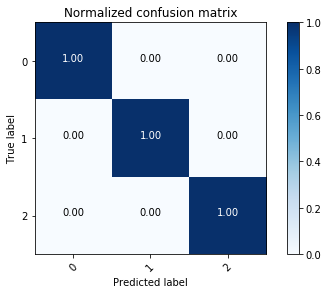


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 19  15   2]
 [  5 279  10]
 [  1   8  23]]
Normalized confusion matrix
[[0.52777778 0.41666667 0.05555556]
 [0.0170068  0.94897959 0.03401361]
 [0.03125    0.25       0.71875   ]]


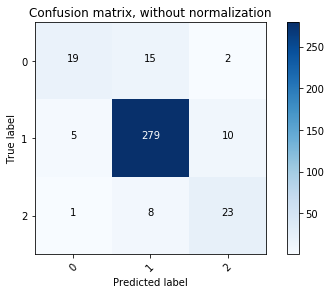

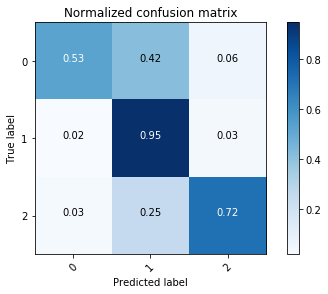

In [58]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.8867

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 315    0    0]
 [   0 2637    0]
 [   0    0  282]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


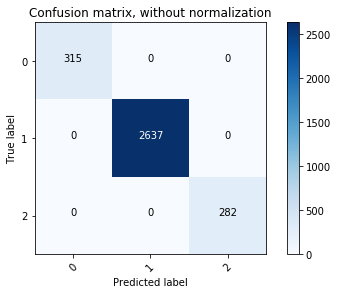

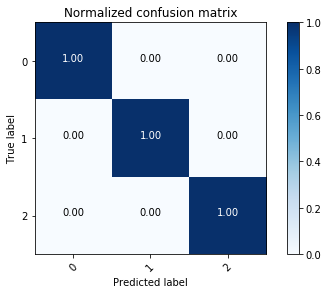


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 18  16   2]
 [  4 281   9]
 [  0  10  22]]
Normalized confusion matrix
[[0.5        0.44444444 0.05555556]
 [0.01360544 0.95578231 0.03061224]
 [0.         0.3125     0.6875    ]]


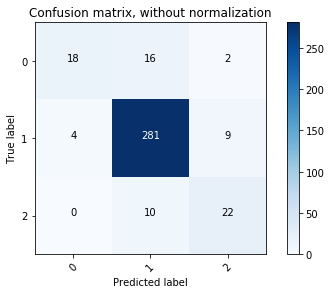

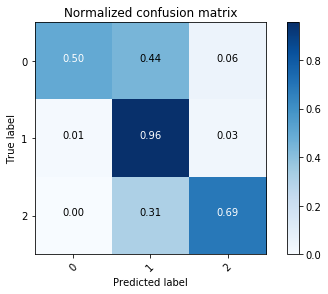

In [59]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.8591

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 315    0    0]
 [   0 2637    0]
 [   0    0  282]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


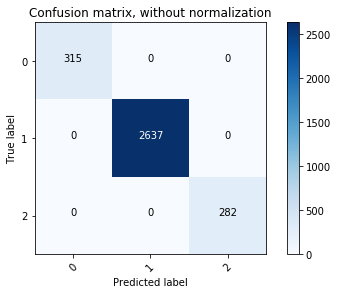

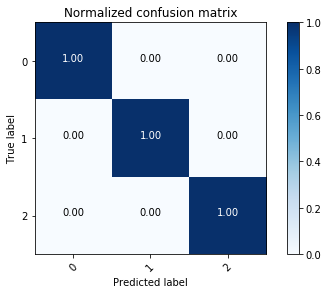


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 21  12   3]
 [  5 270  19]
 [  0  12  20]]
Normalized confusion matrix
[[0.58333333 0.33333333 0.08333333]
 [0.0170068  0.91836735 0.06462585]
 [0.         0.375      0.625     ]]


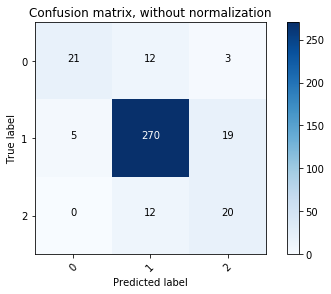

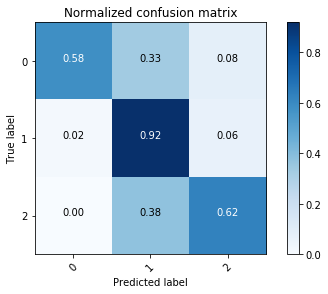

In [60]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.8591

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 315    0    0]
 [   0 2637    0]
 [   0    0  282]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


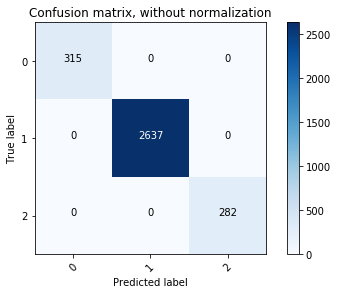

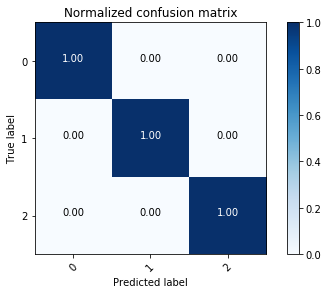


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 20  13   3]
 [  4 272  18]
 [  1  12  19]]
Normalized confusion matrix
[[0.55555556 0.36111111 0.08333333]
 [0.01360544 0.92517007 0.06122449]
 [0.03125    0.375      0.59375   ]]


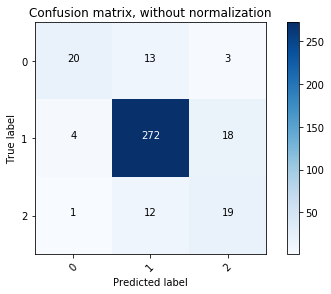

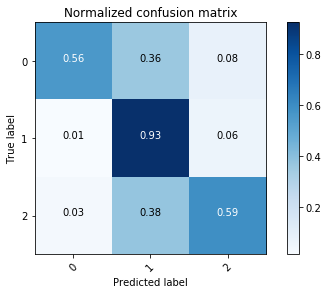

In [61]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.8674

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 315    0    0]
 [   0 2637    0]
 [   0    0  282]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


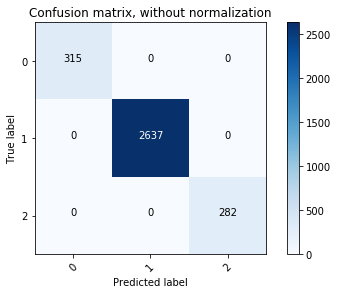

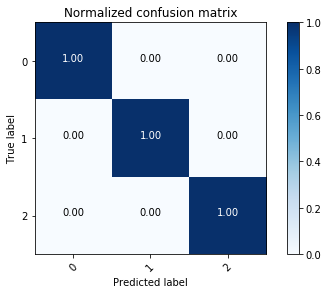


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 16  14   6]
 [  4 276  14]
 [  0  10  22]]
Normalized confusion matrix
[[0.44444444 0.38888889 0.16666667]
 [0.01360544 0.93877551 0.04761905]
 [0.         0.3125     0.6875    ]]


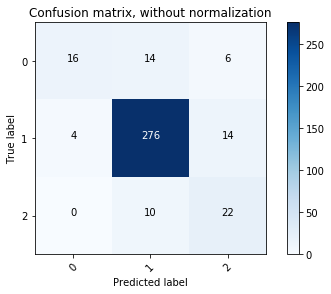

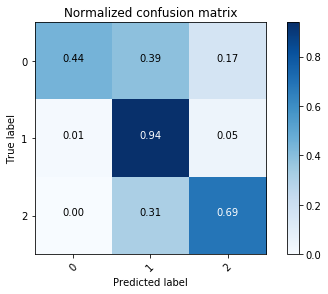

In [62]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.8840

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 315    0    0]
 [   0 2637    0]
 [   0    0  282]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


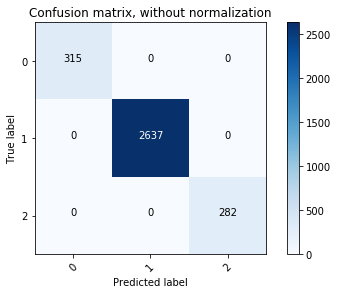

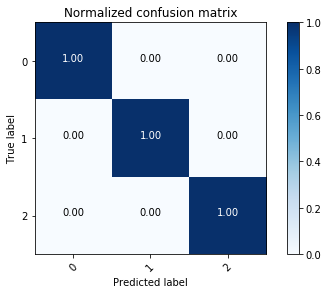


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 17  13   6]
 [  3 283   8]
 [  0  12  20]]
Normalized confusion matrix
[[0.47222222 0.36111111 0.16666667]
 [0.01020408 0.96258503 0.02721088]
 [0.         0.375      0.625     ]]


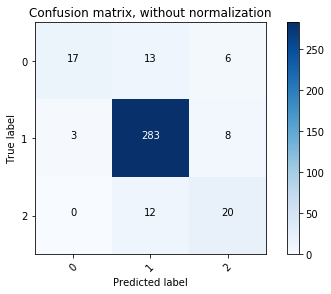

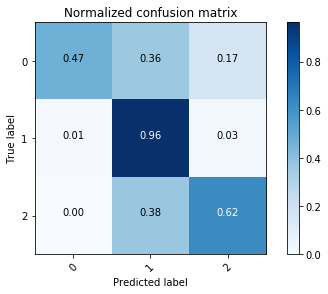

In [63]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### SVM

#### 2 word, 3 char

test accuracy:  0.8895

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 188  123    4]
 [   9 2619    9]
 [   0   63  219]]
Normalized confusion matrix
[[0.5968254  0.39047619 0.01269841]
 [0.00341297 0.99317406 0.00341297]
 [0.         0.22340426 0.77659574]]


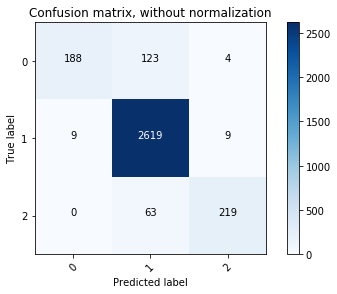

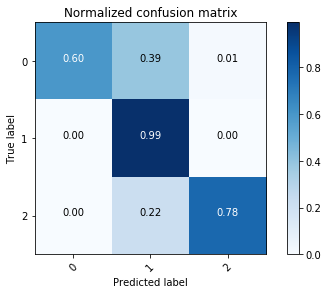


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 17  17   2]
 [  1 285   8]
 [  0  12  20]]
Normalized confusion matrix
[[0.47222222 0.47222222 0.05555556]
 [0.00340136 0.96938776 0.02721088]
 [0.         0.375      0.625     ]]


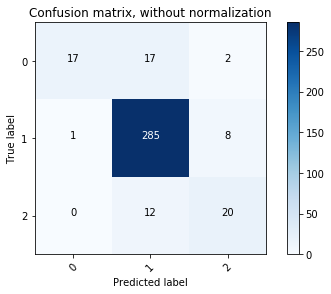

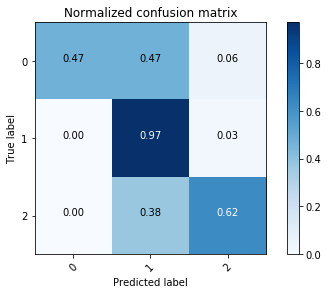

In [73]:
X_train = X_train_2_3
X_test = X_test_2_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.8867

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 189  122    4]
 [   9 2619    9]
 [   0   62  220]]
Normalized confusion matrix
[[0.6        0.38730159 0.01269841]
 [0.00341297 0.99317406 0.00341297]
 [0.         0.21985816 0.78014184]]


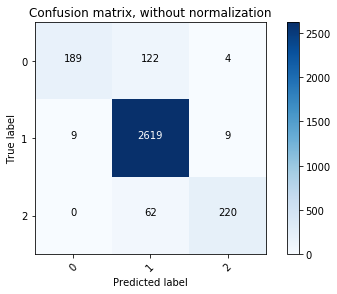

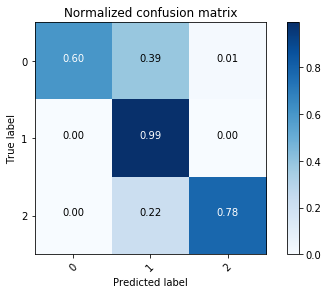


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 17  17   2]
 [  2 284   8]
 [  0  12  20]]
Normalized confusion matrix
[[0.47222222 0.47222222 0.05555556]
 [0.00680272 0.96598639 0.02721088]
 [0.         0.375      0.625     ]]


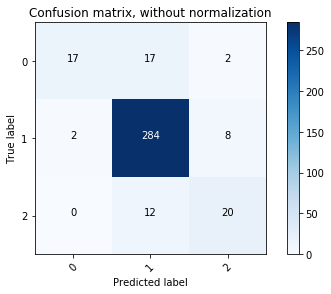

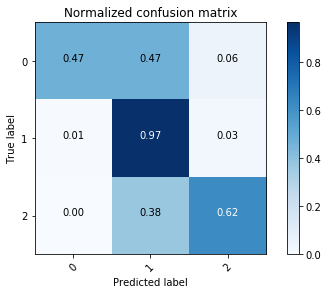

In [74]:
X_train = X_train_2_4
X_test = X_test_2_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.8619

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 196  115    4]
 [   7 2612   18]
 [   0   47  235]]
Normalized confusion matrix
[[0.62222222 0.36507937 0.01269841]
 [0.00265453 0.99051953 0.00682594]
 [0.         0.16666667 0.83333333]]


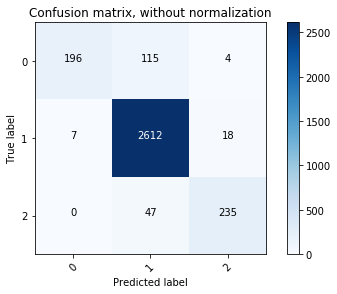

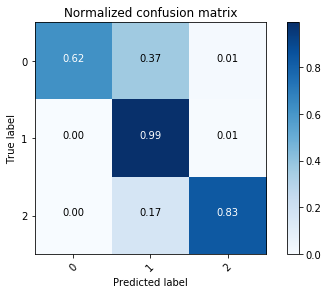


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 17  16   3]
 [  1 276  17]
 [  0  13  19]]
Normalized confusion matrix
[[0.47222222 0.44444444 0.08333333]
 [0.00340136 0.93877551 0.05782313]
 [0.         0.40625    0.59375   ]]


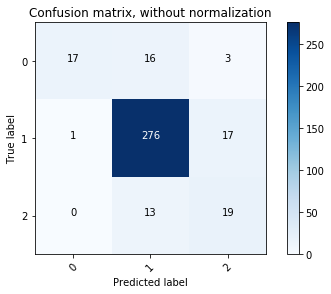

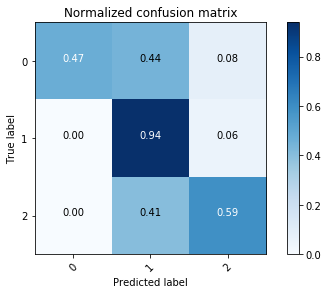

In [75]:
X_train = X_train_3_3
X_test = X_test_3_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.8619

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 197  114    4]
 [   7 2615   15]
 [   0   50  232]]
Normalized confusion matrix
[[0.62539683 0.36190476 0.01269841]
 [0.00265453 0.99165719 0.00568828]
 [0.         0.17730496 0.82269504]]


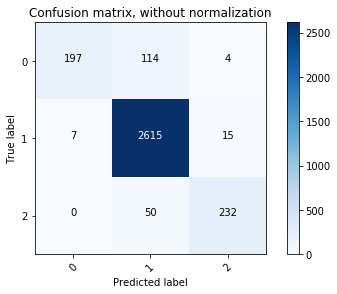

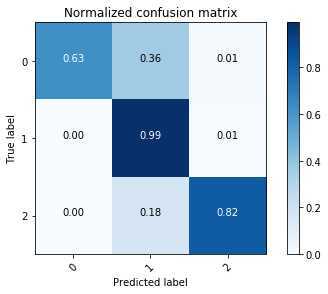


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 17  16   3]
 [  1 276  17]
 [  0  13  19]]
Normalized confusion matrix
[[0.47222222 0.44444444 0.08333333]
 [0.00340136 0.93877551 0.05782313]
 [0.         0.40625    0.59375   ]]


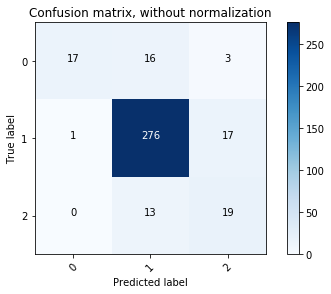

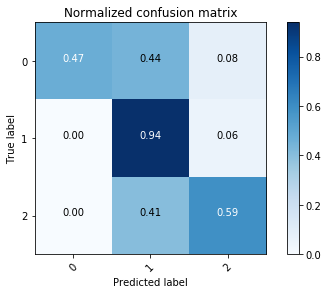

In [76]:
X_train = X_train_3_4
X_test = X_test_3_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.8702

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 206  105    4]
 [  15 2593   29]
 [   0   47  235]]
Normalized confusion matrix
[[0.65396825 0.33333333 0.01269841]
 [0.00568828 0.98331437 0.01099735]
 [0.         0.16666667 0.83333333]]


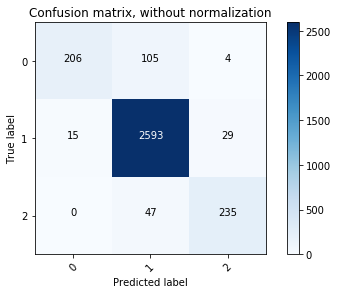

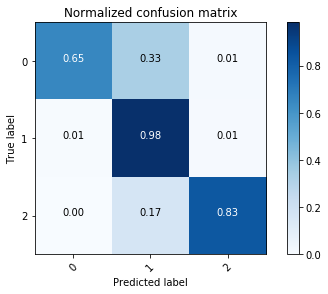


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 15  15   6]
 [  2 278  14]
 [  0  10  22]]
Normalized confusion matrix
[[0.41666667 0.41666667 0.16666667]
 [0.00680272 0.94557823 0.04761905]
 [0.         0.3125     0.6875    ]]


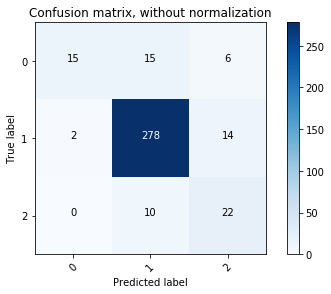

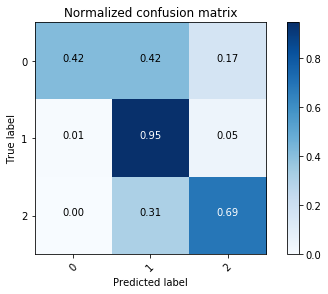

In [77]:
X_train = X_train_4_3
X_test = X_test_4_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.8702

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 206  105    4]
 [  15 2593   29]
 [   0   47  235]]
Normalized confusion matrix
[[0.65396825 0.33333333 0.01269841]
 [0.00568828 0.98331437 0.01099735]
 [0.         0.16666667 0.83333333]]


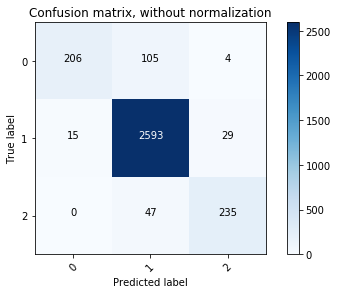

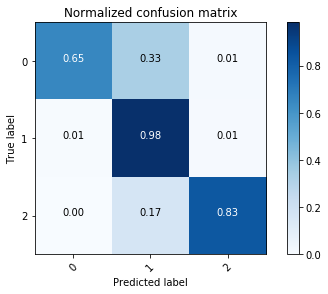


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 15  15   6]
 [  2 278  14]
 [  0  10  22]]
Normalized confusion matrix
[[0.41666667 0.41666667 0.16666667]
 [0.00680272 0.94557823 0.04761905]
 [0.         0.3125     0.6875    ]]


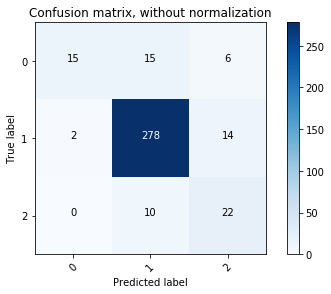

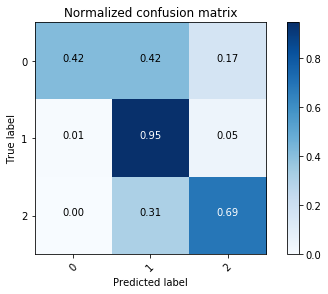

In [78]:
X_train = X_train_4_4
X_test = X_test_4_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

### meta_net

#### 2 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               3584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 135,683
Trainable params: 135,683
Non-trainable params: 0
_________________________________________________________________
None
Train on 3234 samples, validate on 362 samples
Epoch 1/300
3234/3234 [==============================] - 2s 625us/step - loss: 0.316

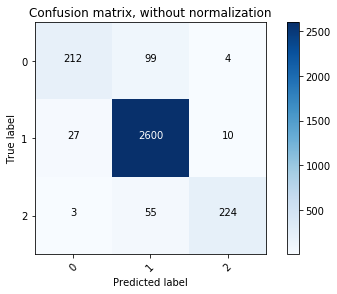

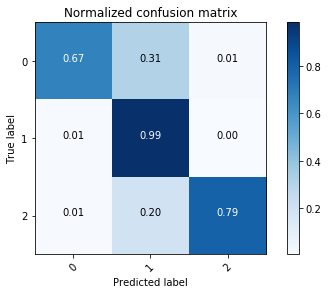


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 19  15   2]
 [  5 281   8]
 [  1  10  21]]
Normalized confusion matrix
[[0.52777778 0.41666667 0.05555556]
 [0.0170068  0.95578231 0.02721088]
 [0.03125    0.3125     0.65625   ]]


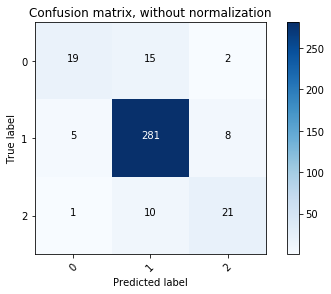

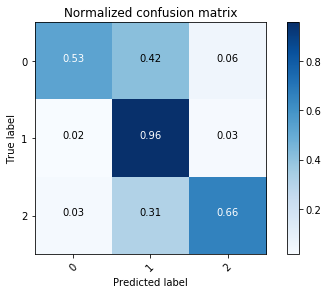

Wall time: 20.8 s


In [82]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_3
X_test = X_test_2_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByShape/meta_net_train_2_3.npy"
file_path_test = "./Stacking_Results_France_ByShape/meta_net_test_2_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 2 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               3584      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 135,683
Trainable params: 135,683
Non-trainable params: 0
_________________________________________________________________
None
Train on 3234 samples, validate on 362 samples
Epoch 1/300
3234/3234 [==============================] - 2s 500us/step - loss: 0.341

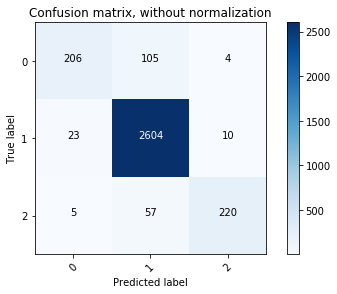

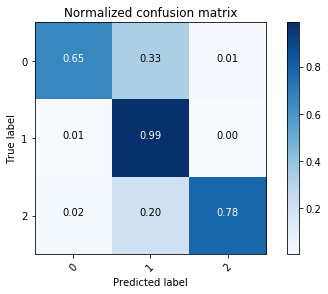


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 20  14   2]
 [  2 284   8]
 [  1  10  21]]
Normalized confusion matrix
[[0.55555556 0.38888889 0.05555556]
 [0.00680272 0.96598639 0.02721088]
 [0.03125    0.3125     0.65625   ]]


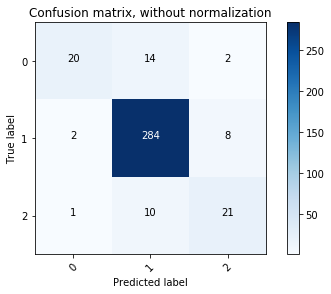

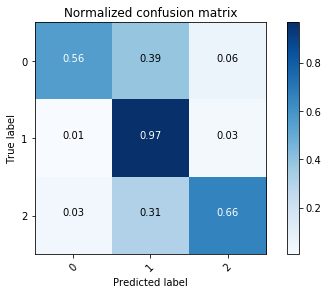

Wall time: 24.2 s


In [86]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_4
X_test = X_test_2_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByShape/meta_net_train_2_4.npy"
file_path_test = "./Stacking_Results_France_ByShape/meta_net_test_2_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               3584      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 771       
Total params: 135,683
Trainable params: 135,683
Non-trainable params: 0
_________________________________________________________________
None
Train on 3234 samples, validate on 362 samples
Epoch 1/300
3234/3234 [==============================] - 2s 483us/step - loss: 0.336

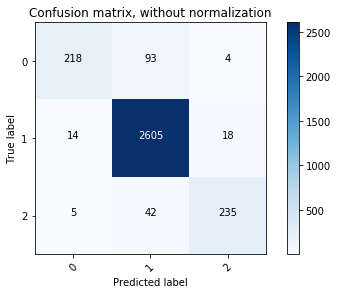

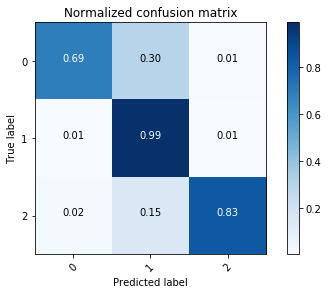


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 19  14   3]
 [  3 275  16]
 [  1  12  19]]
Normalized confusion matrix
[[0.52777778 0.38888889 0.08333333]
 [0.01020408 0.93537415 0.05442177]
 [0.03125    0.375      0.59375   ]]


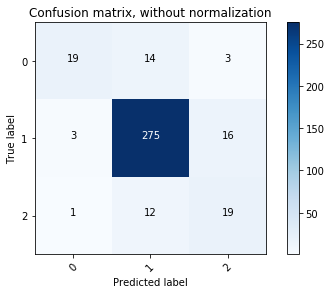

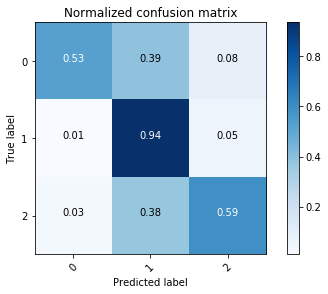

Wall time: 16.4 s


In [87]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_3
X_test = X_test_3_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByShape/meta_net_train_3_3.npy"
file_path_test = "./Stacking_Results_France_ByShape/meta_net_test_3_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               3584      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 771       
Total params: 135,683
Trainable params: 135,683
Non-trainable params: 0
_________________________________________________________________
None
Train on 3234 samples, validate on 362 samples
Epoch 1/300
3234/3234 [==============================] - 2s 487us/step - loss: 0.336

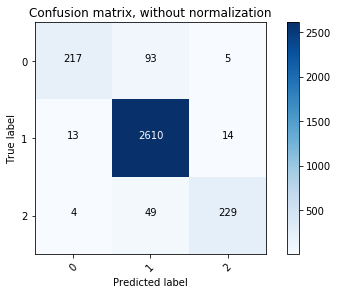

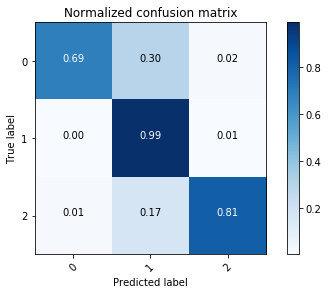


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 20  13   3]
 [  3 274  17]
 [  1  12  19]]
Normalized confusion matrix
[[0.55555556 0.36111111 0.08333333]
 [0.01020408 0.93197279 0.05782313]
 [0.03125    0.375      0.59375   ]]


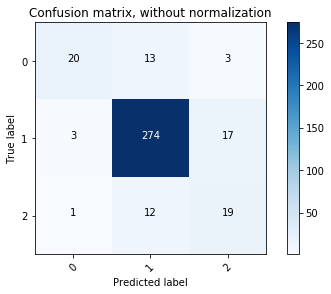

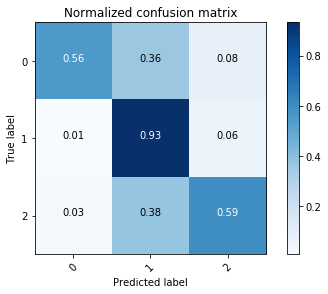

Wall time: 14.9 s


In [88]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_4
X_test = X_test_3_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByShape/meta_net_train_3_4.npy"
file_path_test = "./Stacking_Results_France_ByShape/meta_net_test_3_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               3584      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 771       
Total params: 135,683
Trainable params: 135,683
Non-trainable params: 0
_________________________________________________________________
None
Train on 3234 samples, validate on 362 samples
Epoch 1/300
3234/3234 [==============================] - 2s 564us/step - loss: 0.343

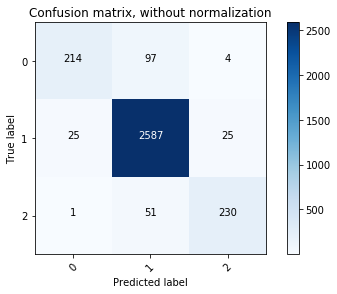

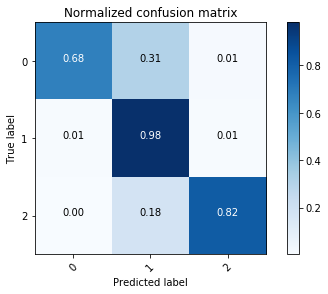


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 18  12   6]
 [  4 279  11]
 [  1  12  19]]
Normalized confusion matrix
[[0.5        0.33333333 0.16666667]
 [0.01360544 0.94897959 0.03741497]
 [0.03125    0.375      0.59375   ]]


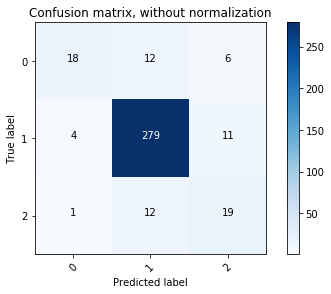

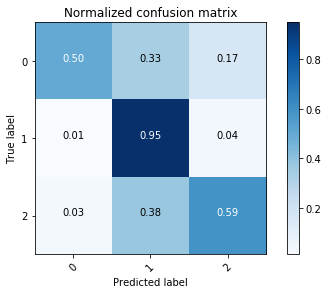

Wall time: 17.1 s


In [89]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_3
X_test = X_test_4_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByShape/meta_net_train_4_3.npy"
file_path_test = "./Stacking_Results_France_ByShape/meta_net_test_4_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               3584      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 771       
Total params: 135,683
Trainable params: 135,683
Non-trainable params: 0
_________________________________________________________________
None
Train on 3234 samples, validate on 362 samples
Epoch 1/300
3234/3234 [==============================] - 2s 561us/step - loss: 0.348

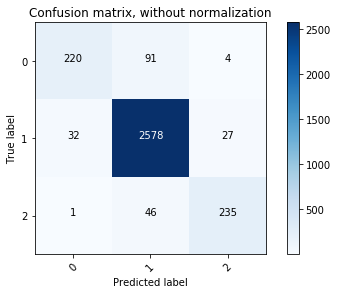

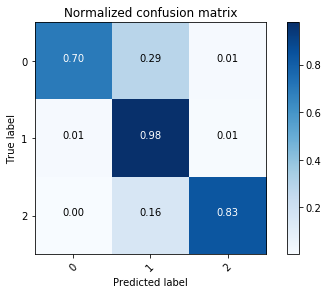


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 19  11   6]
 [  4 278  12]
 [  2   8  22]]
Normalized confusion matrix
[[0.52777778 0.30555556 0.16666667]
 [0.01360544 0.94557823 0.04081633]
 [0.0625     0.25       0.6875    ]]


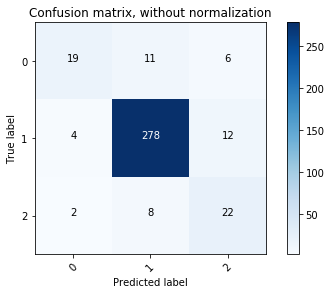

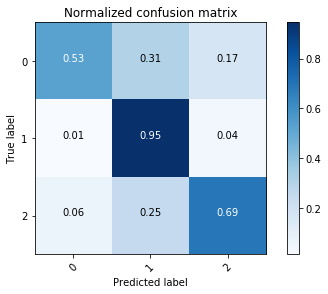

Wall time: 14.3 s


In [90]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_4
X_test = X_test_4_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByShape/meta_net_train_4_4.npy"
file_path_test = "./Stacking_Results_France_ByShape/meta_net_test_4_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)